<a href="https://colab.research.google.com/github/szabild/procmin2/blob/main/procmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Üdvözöljük a Colab webhelyén!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Új&#41; Próbálja ki a Gemini API-t</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Ha már ismeri a Colab szolgáltatást, nézze meg ezt a videót, amelyből további információkhoz juthat az interaktív táblázatokról, a futtatott kódok előzményeit tartalmazó nézetről, valamint a parancspalettáról.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  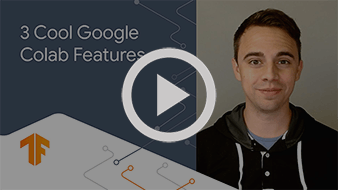
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [5]:
import pandas as pd
df = pd.read_csv('/content/exportgbiall01_05.csv', sep = ";")
df

,Timestamp,User,Case id,Activity,Number of dialog steps
0,2025.03.11 09:51:34,GBIALL-001,1,"Logon successful (type=A, method=P)",-1
1,2025.03.11 09:51:34,GBIALL-001,1,Session Manager Menu Tree Display,162
2,2025.03.11 09:57:20,GBIALL-001,1,G/L Acct Pstg: Single Screen Trans.,201
3,2025.03.11 09:58:07,GBIALL-001,1,G/L Acct Pstg: Single Screen Trans.,201
4,2025.03.11 10:01:20,GBIALL-001,1,G/L Acct Pstg: Single Screen Trans.,201
...,...,...,...,...,...
147,2025.03.11 11:12:27,GBIALL-005,5,Vendor Line Item Browser,49
148,2025.03.11 11:12:50,GBIALL-005,5,Vendor Line Items,47
149,2025.03.11 11:14:06,GBIALL-005,5,Post Outgoing Payments,184
150,2025.03.11 11:19:58,GBIALL-005,5,Post Outgoing Payments,184


In [2]:
pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.3 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=02a8976f65d624aec8806ece6c12247c051d003c51768ac7bc0a82fd1104c084
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [13]:
import pm4py
log = pm4py.format_dataframe(df, case_id='Case id',activity_key='Activity',
                             timestamp_key='Timestamp')
log["time:timestamp"] = pd.to_datetime(df.Timestamp)

In [15]:
pm4py.get_start_activities(log)

{'Logon successful (type=A, method=P)': 3}

In [16]:
pm4py.get_end_activities(log)

{'User Logoff': 3}

In [18]:
pm4py.filter_start_activities(log, {'Vendor Line Items'})

,Timestamp,User,Case id,Activity,Number of dialog steps,case:concept:name,concept:name,time:timestamp,@@index,@@case_index


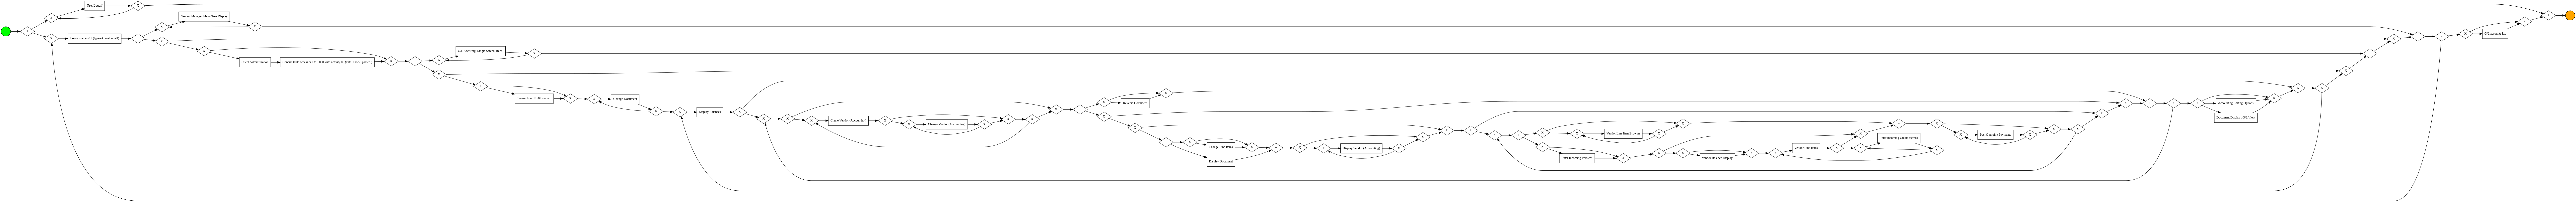

In [21]:
bpmn_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(bpmn_model)

# Új szakasz